ANÁLISE DE GRAFOS

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Criar graph

G=nx.Graph()

CRIAR A REDE E AS LIGAÇÕES

In [4]:
# Criar os nós da rede

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

In [5]:
# Criar relação entre nós

G.add_edge(1,5)
G.add_edge(1,3)
G.add_edge(4,6)
G.add_edge(5,4)
G.add_edge(2,3)
G.add_edge(6,3)
G.add_edge(2,4)

# ou dar uma lista de aresta como imput
#g.add_edge_from([(1,5),(1,3),(4,6),(5,4),(2,3),(6,3),(2,4)])

In [6]:
# Ver as relação entre os nós

G.edges()

EdgeView([(1, 5), (1, 3), (2, 3), (2, 4), (3, 6), (4, 6), (4, 5)])

In [7]:
# Informação sobre o graph

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333


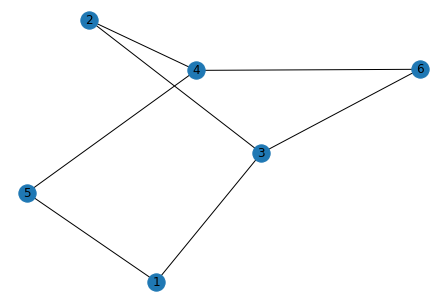

In [12]:
import matplotlib.pyplot as plt

nx.draw(G,with_labels=1)
plt.show()
plt.ioff()

In [13]:
# Diameter - caminho mais curto entre os nós (número de arestas)

print(nx.diameter(G))

2


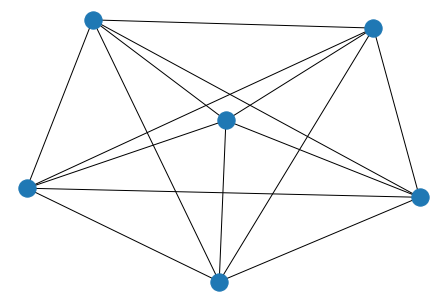

In [15]:
# Exemplo representação de grafos 1

H=nx.complete_graph(6)
nx.draw(H)

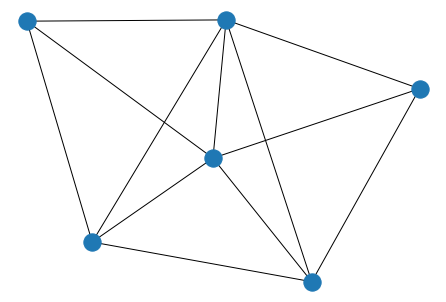

In [20]:
# Exemplo representação de grafos 1

G=nx.gnp_random_graph(6,0.5)
# 0,5 = Probability for edge creation.

nx.draw(G)
plt.show()

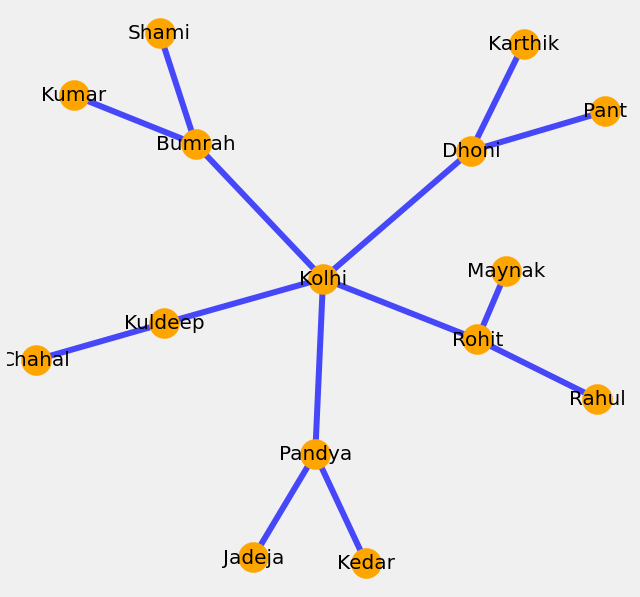

In [23]:
# CRIAR OBJECTO GRAPH
g=nx.Graph() 

# Criar relação entre nós
g.add_edge('Bumrah','Shami')
g.add_edge('Bumrah','Kumar')
g.add_edge('Chahal','Kuldeep')
g.add_edge('Kolhi','Bumrah')
g.add_edge('Kuldeep','Kolhi')
g.add_edge('Rohit','Rahul')
g.add_edge('Rohit','Kolhi')
g.add_edge('Rohit','Maynak')
g.add_edge('Dhoni','Pant')
g.add_edge('Dhoni','Karthik')
g.add_edge('Dhoni','Kolhi')
g.add_edge('Pandya','Kedar')
g.add_edge('Pandya','Jadeja')
g.add_edge('Pandya','Kolhi')

# Definir tamanho do gráfico
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('fivethirtyeight')

pos=nx.spring_layout(g)

# Desenhar nós 
nx.draw_networkx_nodes(g,pos,node_size=900,node_color='Orange')

# Desenhar arestas
nx.draw_networkx_edges(g,pos,width=6,alpha=0.7,edge_color='Blue') #alpha = intensidade da cor

# Desenhar labels
nx.draw_networkx_labels(g,pos,font_size=20,font_family='sans-serif') 
plt.axis('off')
plt.show()


# Elemento mais influencionador na rede - Kohli
# Distribuição em árvore
# Diameter = 4 - caminho mais curto entre os nós mais distantes (número de arestas)
# Rahul - Rohit - Kolhi - Pandya - Kedar (4 arestas que liga o Rahul ao Kedar)


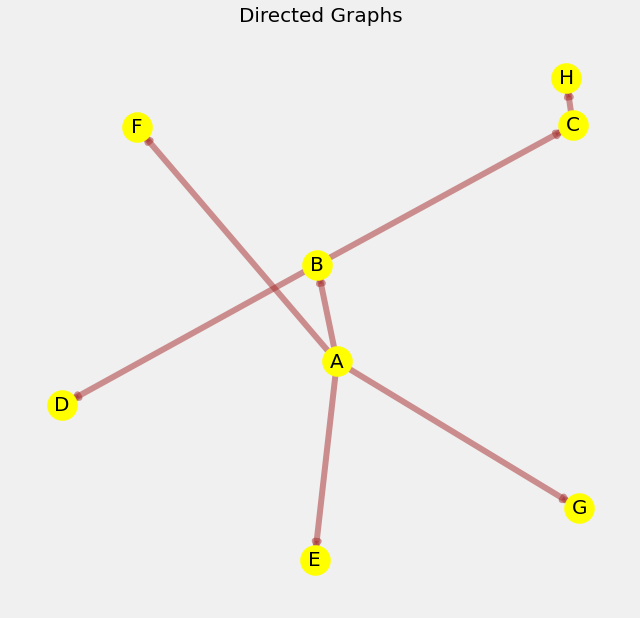

In [24]:
# GRAPHS DIRECCIONADO - a direção entre nodes importa

g = nx.DiGraph()
g.add_edge('A', 'B')
g.add_edge('B', 'C')
g.add_edge('C', 'H')
g.add_edge('B', 'D')
g.add_edge('A', 'E')
g.add_edge('A', 'F')
g.add_edge('A', 'G')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

pos = nx.spring_layout(g)

# Desenhar nós
nx.draw_networkx_nodes(g, pos, node_size = 900, node_color = 'yellow')

# Desenhar arestas
nx.draw_networkx_edges(g, pos, edge_color = 'brown', width = 6, alpha = 0.5)

# Definição da label
nx.draw_networkx_labels(g, pos, font_size=20, font_family='sans-serif')

plt.title('Directed Graphs', fontsize = 20)
plt.axis('off')
plt.show()

MEASURING CENTRALITY

- Degree (Na teoria dos grafos, o grau de um vértice de um grafo é o número de arestas incidentes para com o vértice, com os laços contados duas vezes. Ou de forma análoga, o número de vértices adjacentes a ele)


- Closeness (Em grafos conectados existe uma distância natural métrica entre todos os pares de nós, definido pelo comprimento de seus caminhos mais curtos. O afastamento de um nó s é definido como a soma de suas distâncias para todos os outros nós, e sua proximidade é definida como o inverso do afastamento.Assim, quanto mais central é o nó, menor é a distância do seu total para todos os outros nós. Proximidade pode ser considerada como uma medida de rapidez, para determinar a velocidade que ela necessitará para difundir informações de s a todos os outros nós sequencialmente)


- Betweenness (Centralidade de intermediação quantifica o número de vezes que um nó age como ponte ao longo do caminho mais curto entre dois outros nós)


- Eigenvector (uma medida da influência de um nó numa rede. Ele atribui pontuações relativas a todos os nós da rede, baseada no conceito de que as ligações para os nós de alta pontuação contribuem mais para a pontuação do nó em questão do que ligações iguais a nós baixa pontuação)

In [29]:
import networkx as nx
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# We are using data from directed graph to find closness for Node A 
# Número de arestas incidentes para com o vértice

g.degree("A")

4

In [31]:
# Degree of all the other nodes in directed graph g

g.degree()

DiDegreeView({'A': 4, 'B': 3, 'C': 2, 'H': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1})

In [34]:
# Ver top 3 de nodes com maior degree

sorted(g.degree(), key=lambda x:x[1], reverse=True)[:3]

[('A', 4), ('B', 3), ('C', 2)]

In [37]:
# Find out degree centraility of all nodes of directed graph g

degree_centrality = nx.degree_centrality(g)
degree_centrality

{'A': 0.5714285714285714,
 'B': 0.42857142857142855,
 'C': 0.2857142857142857,
 'H': 0.14285714285714285,
 'D': 0.14285714285714285,
 'E': 0.14285714285714285,
 'F': 0.14285714285714285,
 'G': 0.14285714285714285}

In [38]:
# Top 3.  Percent of cast this character has been with.

sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

[('A', 0.5714285714285714),
 ('B', 0.42857142857142855),
 ('C', 0.2857142857142857)]